## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

%matplotlib inline

In [2]:
df = pd.read_csv("Algeria_forest_fire_updated.csv", index_col=0)
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
240,25.0,9.0,2012.0,28.0,70.0,15.0,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0
156,3.0,7.0,2012.0,34.0,56.0,17.0,0.1,84.7,9.7,27.3,4.7,10.3,5.2,1
169,16.0,7.0,2012.0,31.0,83.0,17.0,0.0,84.5,19.4,33.1,4.7,19.2,7.3,1
11,12.0,6.0,2012.0,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,1
125,2.0,6.0,2012.0,30.0,73.0,13.0,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0


In [3]:
#Checking for Null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [4]:
# Saparating Dependent and Independent Features
X = df.drop("Classes", axis=1)
y = df["Classes"]

In [5]:
#Spliting Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
X_train.shape, X_test.shape

((218, 13), (25, 13))

In [6]:
X_train.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,218.000000,218.000000,218.0,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,15.449541,7.522936,2012.0,32.096330,62.243119,15.431193,0.744954,77.571560,14.669266,49.316972,4.661927,16.658716,6.955505
std,8.886884,1.116251,0.0,3.620842,14.782621,2.823101,1.801432,14.575512,12.679764,47.454439,4.139433,14.448531,7.497870
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,7.250000,7.000000,2012.0,30.000000,53.000000,14.000000,0.000000,71.100000,5.275000,10.425000,1.325000,5.800000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,82.950000,11.250000,33.250000,3.300000,12.000000,4.200000
75%,23.000000,9.000000,2012.0,35.000000,73.750000,17.000000,0.500000,88.100000,20.525000,71.375000,6.975000,22.900000,10.900000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,13.100000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


# Feature Selection

- FFMC,FWI,BUI,ISI

### 1. Using Variance Threshold

In [7]:
# Removing Constant data or less variance data, this will help in reducing Feature which is of no use.
vt = VarianceThreshold(threshold=0)
vt.fit(X_train)

VarianceThreshold(threshold=0)

In [8]:
const_columns = [column for column in X_train.columns 
                      if column not in X_train.columns[vt.get_support()]]
const_columns

['year']

- Year only contain one value "2012" which act as a constant so removing it will not harm our model.

## 2. Mutual Info Classification

In [9]:
# Creating an Object of Mutual_info_classification
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.13154006, 0.01392964, 0.14888408, 0.12141848,
       0.00522917, 0.23389853, 0.6372004 , 0.33157683, 0.31947519,
       0.657796  , 0.34405654, 0.55463528])

<AxesSubplot:>

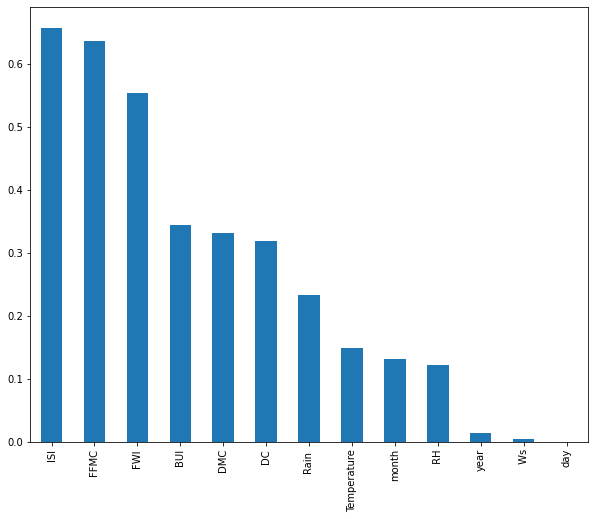

In [10]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info = mutual_info.sort_values(ascending=False)
mutual_info.plot(kind="bar", figsize=(10,8))

In [11]:
# Selecting top 8 Feature
from sklearn.feature_selection import SelectPercentile

#Creating Object
select_best_feature = SelectPercentile(mutual_info_classif,percentile=65)

# Fitting X and y data
select_best_feature.fit(X_train, y_train)

#Extracting Required Feature
Selected_feature = X_train.columns[select_best_feature.get_support()]
Selected_feature

Index([' RH', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'], dtype='object')

In [12]:
# Removed Feature
drop_feature = [feature for feature in X_train.columns if feature not in Selected_feature]

In [13]:
# Droping Features
X_train.drop(drop_feature, axis=1, inplace=True)
X_train.describe()

,RH,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,62.243119,0.744954,77.571560,14.669266,49.316972,4.661927,16.658716,6.955505
std,14.782621,1.801432,14.575512,12.679764,47.454439,4.139433,14.448531,7.497870
min,21.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,53.000000,0.000000,71.100000,5.275000,10.425000,1.325000,5.800000,0.700000
50%,63.000000,0.000000,82.950000,11.250000,33.250000,3.300000,12.000000,4.200000
75%,73.750000,0.500000,88.100000,20.525000,71.375000,6.975000,22.900000,10.900000
max,90.000000,13.100000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


## 3. Correlation Between Features

<AxesSubplot:>

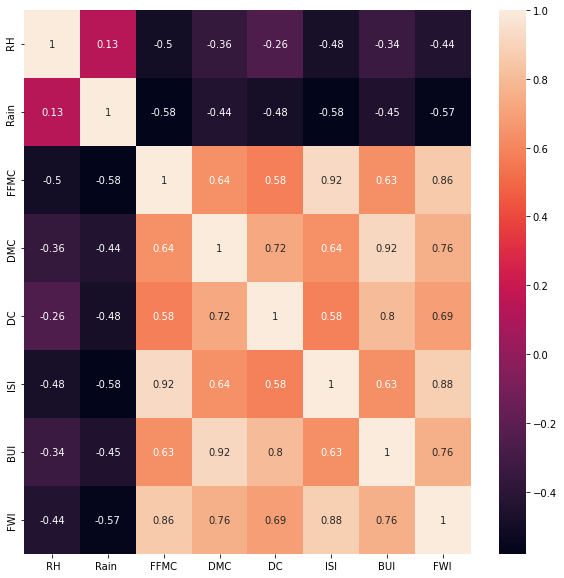

In [14]:
# Correlation between Features using Spearman method
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(method="kendall"), annot=True)

- Highly Correlated.
- Using Random Forest to Determine Better Feature for Splitting

## 4. Using Model To Determine Useful Feature

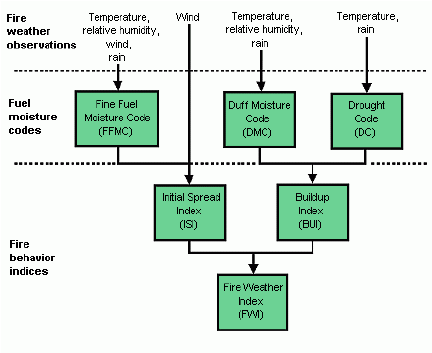

In [15]:
#Taking Decision tree for selection Suitable Feature.
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

<AxesSubplot:>

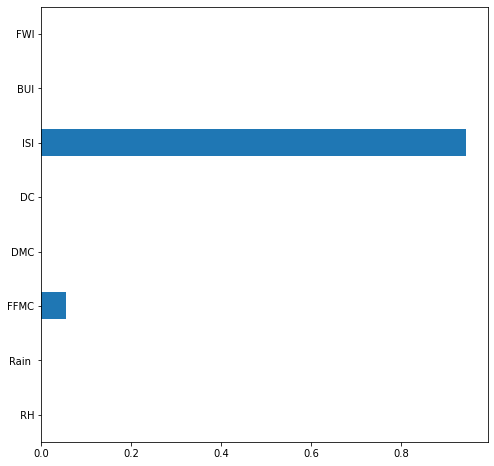

In [16]:
dt.feature_importances_
dt_score = pd.Series(dt.feature_importances_)
dt_score.index = X_train.columns
dt_score.plot(kind="barh", figsize=(8,8))

In [17]:
dt.score(X_test.drop(drop_feature,axis=1),y_test)

0.92

In [18]:
#Taking Linear Regression for best feature
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

<AxesSubplot:>

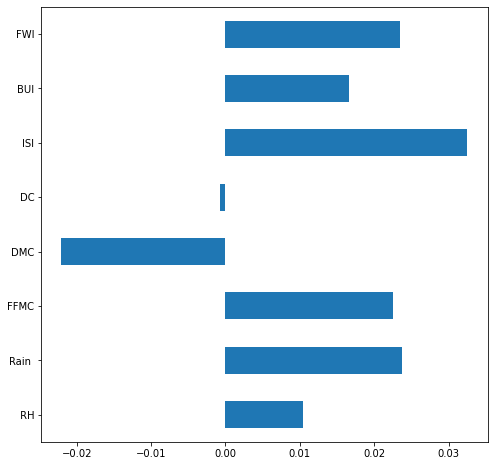

In [19]:
lr_score = pd.Series(lr.coef_)
lr_score.index = X_train.columns
lr_score.plot(kind="barh", figsize=(8,8))

In [20]:
lr.score(X_test.drop(drop_feature,axis=1),y_test)

0.6373819230789539

- Observations:
    - Temprature, DMC, DC are Least Required Features For Prediction of Fire
    - Most Essential feature are FFMC, ISI, FWI, BUI 
    - Rain Showing negative Relation so I am Also Selecting Rainfor my Feature

In [21]:
# Final Features are: 
X_train = X_train.loc[:,['Rain ', 'FFMC', 'ISI', 'BUI', 'FWI']]
X_train.columns

Index(['Rain ', 'FFMC', 'ISI', 'BUI', 'FWI'], dtype='object')

# Feature PreProcessing

## 1. Skewness in data

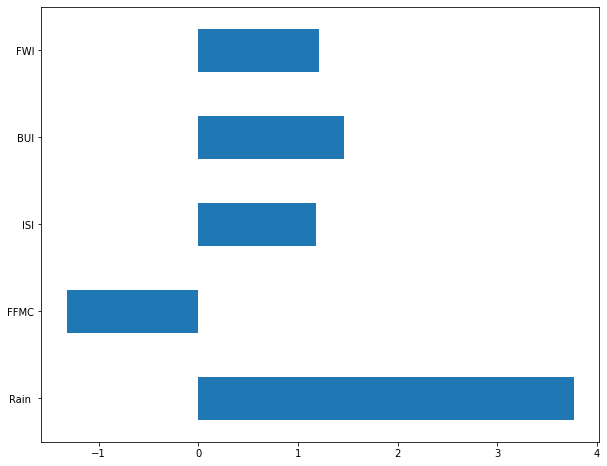

In [22]:
X_train.skew().plot(kind="barh", figsize=(10,8));

- Rain is Highly Right Skewed
- Except FFMC all Features are Right Skewed
- For Right Skewed data Lograthimic Transformations is applied
- For Left skewed data (Sqr root or Sqr) 

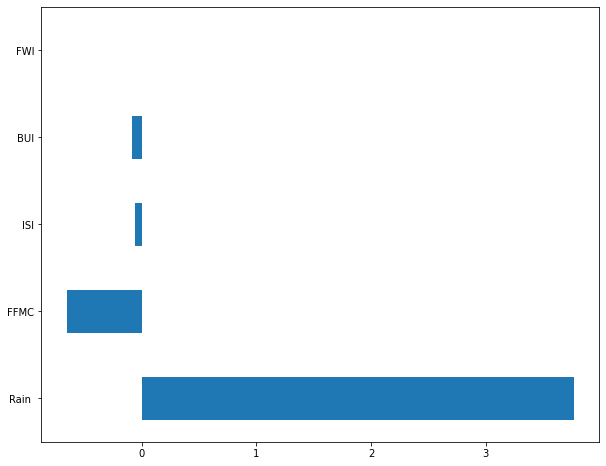

In [23]:
# Create new dataset with right skew adjusted
rSkew_feature = ["ISI", "BUI", "FWI", "Rain"]
lSkew_feature = ["FFMC"]

# Creating new Dataset and Adding small "0.1" for Zero
X_train_skew = X_train.copy() 

for feature in X_train.columns:
    if feature in rSkew_feature:
        # Taking Log of right skew dataset
        X_train_skew[feature] = np.log1p(X_train_skew[feature])
    
    elif feature in lSkew_feature:
        # Taking sqr of data
        X_train_skew[feature] = X_train_skew[feature]**3
        
#new Skewed dataset
X_train_skew.skew().plot(kind="barh", figsize=(10,8));

<AxesSubplot:>

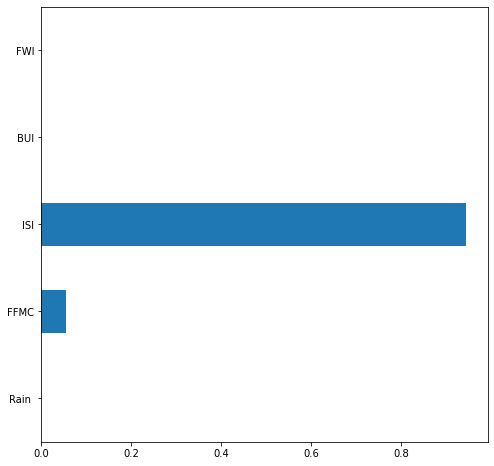

In [24]:
# Building Decision Tree
dt1 = DecisionTreeClassifier()
dt1.fit(X_train_skew,y_train)
dt1_score = pd.Series(dt1.feature_importances_)
dt1_score.index = X_train.columns
dt1_score.plot(kind="barh", figsize=(8,8))

In [25]:
X_train_skew.columns

Index(['Rain ', 'FFMC', 'ISI', 'BUI', 'FWI'], dtype='object')

<AxesSubplot:>

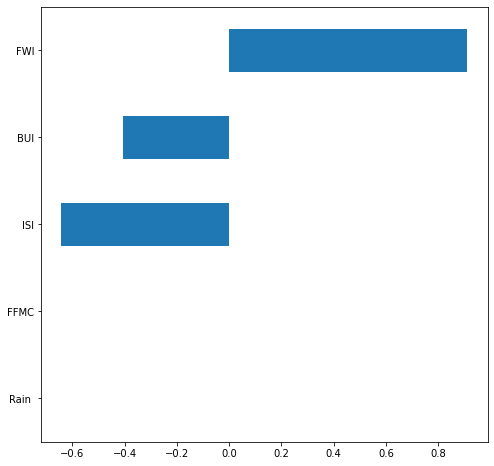

In [26]:
#Building Linear Model
lr1 = LinearRegression()
lr1.fit(X_train_skew,y_train)
lr1_score = pd.Series(lr1.coef_)
lr1_score.index = X_train.columns
lr1_score.plot(kind="barh", figsize=(8,8))

In [27]:
# Create new test dataset with  skew adjusted
rSkew_feature = ["ISI", "BUI", "FWI", "Rain"]
lSkew_feature = ["FFMC"]

# Creating new Dataset and Adding small "0.1" for Zero
X_test_skew = X_test.copy() 
X_test_skew = X_test_skew.loc[:,['Rain ', 'FFMC', 'ISI', 'BUI', 'FWI']]

for feature in X_train.columns:
    if feature in rSkew_feature:
        # Taking Log of right skew dataset
        X_test_skew[feature] = np.log1p(X_test_skew[feature])
    
    elif feature in lSkew_feature:
        # Taking sqr of data
        X_test_skew[feature] = X_test_skew[feature]**3

- Decision Tree and Linear Model Score after 

In [28]:
dt1.score(X_test_skew,y_test)

0.92

In [29]:
lr1.score(X_test_skew,y_test)

0.800061698486978

- Observations:
    1. After Adjusting Skewness R2_Score of Linear Regression Increased thats mean SVC will work better in this Data
    2. Decision Tree Showing Similar Result Which Mean Skewness did not Affect on this Model, AdaBoost or Gradient Boosting will improve the Result.
    3. Rain showing Zero weight in Both Model Removing it will not Affect our Model performance.

In [30]:
# Standard Scaling dataset for Better Result in Linear Regression
st = StandardScaler()
X_train_skew_st = st.fit_transform(X_train_skew)

<AxesSubplot:>

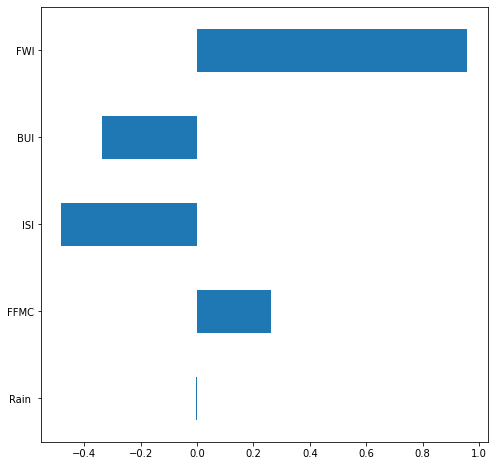

In [31]:
#Building Linear Model
lr2 = LinearRegression()
lr2.fit(X_train_skew_st,y_train)
lr2_score = pd.Series(lr2.coef_)
lr2_score.index = X_train.columns
lr2_score.plot(kind="barh", figsize=(8,8))

In [32]:
# For R2 Score of Test set
X_test_skew_st = st.transform(X_test_skew)
lr2.score(X_test_skew_st,y_test)

0.8000616984877487

<AxesSubplot:>

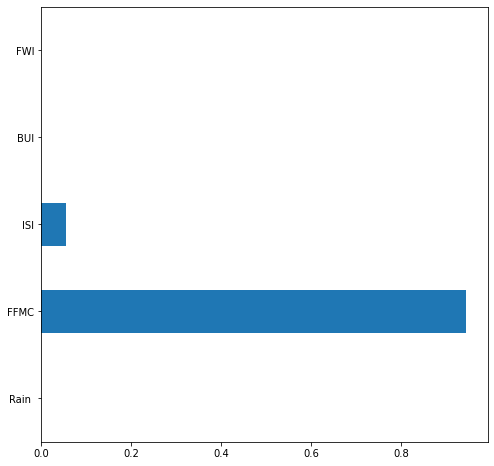

In [33]:
# Building Decision Tree
dt2 = DecisionTreeClassifier()
dt2.fit(X_train_skew_st,y_train)
dt2_score = pd.Series(dt2.feature_importances_)
dt2_score.index = X_train.columns
dt2_score.plot(kind="barh", figsize=(8,8))

In [34]:
dt1.score(X_test_skew_st,y_test)

C:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.4

- Observations:
    1. After Standard Scaling Decision tree Prediction Reduce more then Half and LinearRegress dose not Change Much.

In [35]:
#Droping Rain from dataset
X_train_skew.drop("Rain ", axis=1, inplace=True)
X_test_skew.drop("Rain ", axis=1, inplace=True)

<AxesSubplot:>

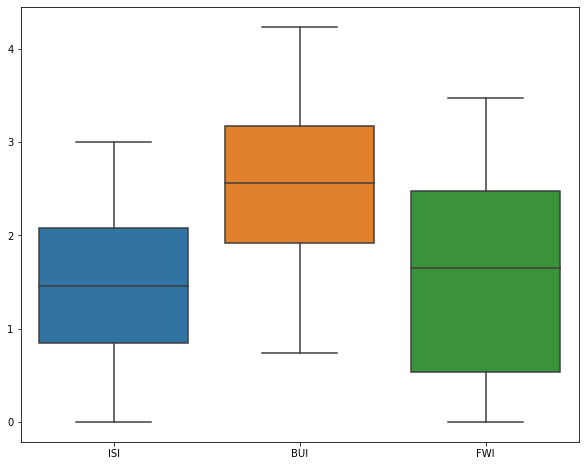

In [36]:
# Checking for OutLiers
plt.figure(figsize=(10,8))
sns.boxplot(data=X_train_skew.loc[:,["ISI", "BUI", "FWI"]])

- No Outliers in dataset

## Selecting Best Model

In [37]:
# Taking Base Models

#Linear Models
logr = LogisticRegression()
lasso = Lasso()
ridge = Ridge()

#SVC
svc = SVC()

# Ensabel Models
random_forest = RandomForestClassifier()
adaBoost = AdaBoostClassifier()

#XGBoost
xgBoost = XGBClassifier()

In [38]:
models = {"Logistic" : logr, "Lasso" : lasso, "Ridge" : ridge, "SVC": svc, "Random Forest" : random_forest,
          "AdaBoost" : adaBoost, "XGBoost" : xgBoost}

for Name, model in models.items():
    print("_-_"*35)
    model.fit(X_train_skew, y_train)
    score = model.score(X_test_skew, y_test)
    print("Model Name : ", Name)
    print("R2 Score : ", round(score, 2))

_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Model Name :  Logistic
R2 Score :  0.6
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Model Name :  Lasso
R2 Score :  0.73
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Model Name :  Ridge
R2 Score :  0.8
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Model Name :  SVC
R2 Score :  0.92
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Model Name :  Random Forest
R2 Score :  0.92
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Model Name :  AdaBoost
R2 Score :  0.92
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Model Name :  XGBoost
R2 S

 - Observations:
     1. XGBoost, AdaBoost, Random Forest and SVC Are Performing better
     2. Hyper Parameter Tunning and GridSearchCV will bring best Result

## GridSerchCV

In [56]:
from sklearn.model_selection import GridSearchCV

#Appling Grid Search Cv for optimal Parameters:
def to_GridSearch(estimator, parameters):
    # Creating Object of GridSearchCV
    gs = GridSearchCV(estimator=estimator, param_grid=parameters, n_jobs=-1,verbose=2, cv=5)
    gs.fit(X_train_skew.values,y_train)
    print("Best Perameters are :- ", gs.best_params_)
    print("Accuracy Score : ", gs.best_score_)
    return gs.best_estimator_

- Selecting Best Estimator for AdaBoost

In [40]:
#Logistic Regression
para = dict(solver = ['saga'],C=[0.1, 0.01, 10], penalty=[ 'l1', 'l2', 'none'])
lr = to_GridSearch(LogisticRegression(),para)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Perameters are :-  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy Score :  0.5596194503171248


In [41]:
# Decision Tree
param = {"criterion":['gini','entropy'],
         "max_depth" : [2,3,4,5]}
dt = to_GridSearch(DecisionTreeClassifier(),param)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Perameters are :-  {'criterion': 'gini', 'max_depth': 4}
Accuracy Score :  0.9908033826638478


In [42]:
#Random Forest
param = {"criterion":['gini','entropy'],
         "max_depth" : [2,3,4,5,None]}
rf = to_GridSearch(RandomForestClassifier(), param)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Perameters are :-  {'criterion': 'gini', 'max_depth': 4}
Accuracy Score :  0.9908033826638478


In [43]:
#Adaboost with logistic regression
param = {"base_estimator":[dt,lr,None],
    "n_estimators":[50,200,300],
         "learning_rate":[1,0.1,0.01,0.001]}

ada_lr = to_GridSearch(AdaBoostClassifier(),param)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Perameters are :-  {'base_estimator': None, 'learning_rate': 1, 'n_estimators': 50}
Accuracy Score :  0.9954545454545455


In [44]:
#XGBoost
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
xgb = to_GridSearch(XGBClassifier(),params)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Best Perameters are :-  {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3}
Accuracy Score :  0.9908033826638478


In [45]:
print("Decision Tree : ", dt.score(X_test_skew.values,y_test))
print("Ada Boost : ", ada_lr.score(X_test_skew.values,y_test))
print("XGBoost : ", xgb.score(X_test_skew.values,y_test))

Decision Tree :  0.92
Ada Boost :  0.92
XGBoost :  0.92


- Observation:
    1. Either Modles are Performing too well or OverFitted
    2. Taking Confusion Metrics to Get Some idea of High Variance

In [46]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

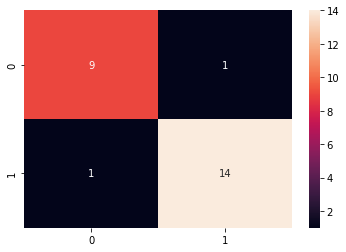

In [47]:
#Decision Tree
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_skew.values)), annot=True)

<AxesSubplot:>

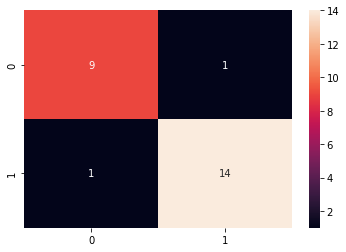

In [48]:
#Adaptive Boost
sns.heatmap(confusion_matrix(y_test, ada_lr.predict(X_test_skew.values)), annot=True)

<AxesSubplot:>

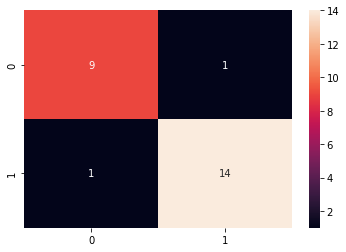

In [49]:
#XGBoost
sns.heatmap(confusion_matrix(y_test, xgb.predict(X_test_skew.values)), annot=True)

- Confusion Matrix dosen't solve the Problem Taking Cross val score to get an idea of Overfitting data

# K-fold cross val score

In [50]:
X_final = X.loc[:,['FFMC', 'ISI', 'BUI', 'FWI']]
y_final = y

# Create new test dataset with  skew adjusted
rSkew_feature = ["ISI", "BUI", "FWI"]
lSkew_feature = ["FFMC"]


for feature in X_final.columns:
    if feature in rSkew_feature:
        # Taking Log of right skew dataset
        X_final[feature] = np.log1p(X_final[feature])
    
    elif feature in lSkew_feature:
        # Taking sqr of data
        X_final[feature] = X_final[feature]**3

In [51]:
# For X_train and y_train
from sklearn.model_selection import cross_val_score

Models = {"Decision Tree":dt, "XGBoost" : xgb, "Adaboost" : ada_lr}
for name, model in Models.items():
    score = cross_val_score(model, X_train_skew.values, y_train, n_jobs=2, cv=5).mean()
    print("Model name : " , name)
    print("Average Score : ", score)

Model name :  Decision Tree
Average Score :  0.9815010570824525
Model name :  XGBoost
Average Score :  0.9908033826638478
Model name :  Adaboost
Average Score :  0.9954545454545455


In [52]:
# For X_final
Models = {"Decision Tree":dt, "XGBoost" : xgb, "Adaboost" : ada_lr}
for name, model in Models.items():
    score = cross_val_score(model, X_final.values, y_final, n_jobs=2, cv=5).mean()
    print("Model name : " , name)
    print("Average Score : ", score)

Model name :  Decision Tree
Average Score :  0.9672619047619048
Model name :  XGBoost
Average Score :  0.9836734693877551
Model name :  Adaboost
Average Score :  0.9754251700680273


- XG boost is performing Best with Accuracy 98% Taking Pickle of best Model

## Making Pickle of Model

In [53]:
xgb.score(X_test_skew.values, y_test)

0.92

In [54]:
import pickle

# Creating XGBoost Pickle file

pickle.dump(xgb, open("XGBModel.pkl", "wb"))

In [55]:
# Testing Pickle Model

test_model = pickle.load(open("XGBModel.pkl", "rb"))

cross_val_score(test_model,X_final.values, y_final, n_jobs=3, cv=5).mean()

0.9836734693877551

In [59]:
xgb2 = XGBClassifier(colsample_bytree = 0.5, gamma= 0.0, learning_rate= 0.05, max_depth= 3, min_child_weight= 3)

In [60]:
xgb2.fit(X_train_skew.values,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
xgb2.score(X_test_skew.values,y_test)

0.92

In [ ]:
c